# Student performence Indicator

#Life cycle of Machine learning Project
1.Understanding the Problem Statement
2.Data Collection
3.Data Checks to perform
4.Exploratory data analysis
5.Data Pre-Processing
6.Model Training
7.Choose best model

# 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977


In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import warnings

In [58]:
dt=pd.read_csv(r"C:\Users\NIDHI\Downloads\student_performence_project\notebook\StudentsPerformance.csv")

In [59]:
dt.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


shape of dataset


In [60]:
dt.shape

(1000, 8)

# DATA CHECKS TO PERFORM
.check missing value

.check duplicates

*.check datatype 

*.check the no. of unique value of each column

.check statistics of dataset

.check various catagories present in the different catagorical column


# CHECK THE MISSING VALUE

In [61]:
dt.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no missing value

# check missing value

In [62]:
dt.duplicated().sum()

0

check the datatype

In [63]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


check the no. of unique value of each column

In [64]:
dt.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

check statistics of dataset

In [65]:
dt.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#Insight
*from the above no. of the numerical data,all mean are very close to each other-b/w 66 and 69
* all standered deviation are also close- b/w 14.6 and15.19
* while there is a minimum score 0 for math, for writing min  much higher-10, and for reading min yet higher =17

# Exploring data

check various catagories present in the different catagorical column

In [66]:
print("catagories in 'gender' variable: " ,end=" ")
print(dt['gender'].unique())

print("catogorie in 'race/ethnicity' variable:" ,end=" ")
print(dt['race/ethnicity'].unique())

print("catagorie in 'parental level of education' variable: ",  end=" ")
print(dt['parental level of education'].unique())

print("catagorie in 'lunch' variable: " , end =" ")
print(dt['lunch'].unique())

print("catagorie in 'test preparation course' variable :" , end=" ")
print(dt['test preparation course'].unique())

print("catagorie in 'math score' variable :" , end= " ")
print(dt['math score'].unique())

print("catagorie in 'reading score' variable: ", end=" ")
print(dt['reading score'].unique())

print("catagorie in 'variable ': ", end=" ")
print(dt['reading score'].unique())


print("catagorie in 'writing score''variable ': ", end=" ")
print(dt['writing score'].unique())
                 
                  


catagories in 'gender' variable:  ['female' 'male']
catogorie in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
catagorie in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
catagorie in 'lunch' variable:  ['standard' 'free/reduced']
catagorie in 'test preparation course' variable : ['none' 'completed']
catagorie in 'math score' variable : [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
catagorie in 'reading score' variable:  [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63

In [67]:
# define numericat and catagorical column 
numerical_feture=[feature for  feature in dt.columns  if dt[feature].dtype != '0']
catagorical_feature=[ feature for feature in dt.columns  if dt[feature].dtype == '0']


print('\nwe have {} numerical_feature : {}'.format(len(numerical_feture),numerical_feture))
print('\nwe have {} catagorical_feature : {}'.format(len(catagorical_feature),catagorical_feature))






we have 8 numerical_feature : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

we have 0 catagorical_feature : []


# adding column for "total score" and "average"

In [68]:
dt['total_score'] = dt['math score'] + dt['reading score'] + dt['writing score']  
dt['average']= dt['total_score']/3
dt.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [69]:
reading_full= dt[dt['reading score']==100]['average'].count()
writing_full=dt[dt['writing score']==100]['average'].count()
math_full=dt[dt['math score']==100]['average'].count()

print(f'no. of student with full marks in reading: {reading_full}')
print( f'no. of student full marks in writing : {writing_full}')
print(f'no. of student with full marks in maths : {math_full}')

no. of student with full marks in reading: 17
no. of student full marks in writing : 14
no. of student with full marks in maths : 7


In [70]:
reading_less= dt[dt['reading score']<=20]['average'].count()
writing_less =dt[dt['writing score']<=20 ]['average'].count()
math_less= dt[dt['writing score']<=20]['average'].count()

print(f'no. of student who got less then 20 marks  in reading: {reading_less}')
print(f'no. of student who got less then 20 marks in writing :{writing_less}')
print(f'no. of student who got less then 20 marks in math: {math_less}')

no. of student who got less then 20 marks  in reading: 1
no. of student who got less then 20 marks in writing :3
no. of student who got less then 20 marks in math: 3


# insights
.student perform best in reding and worst in writing and math

# Exploring data (visualization)
visualize average score distribution to make some conclusion

.Histogram

.Kernel distribution funtion(KDE)

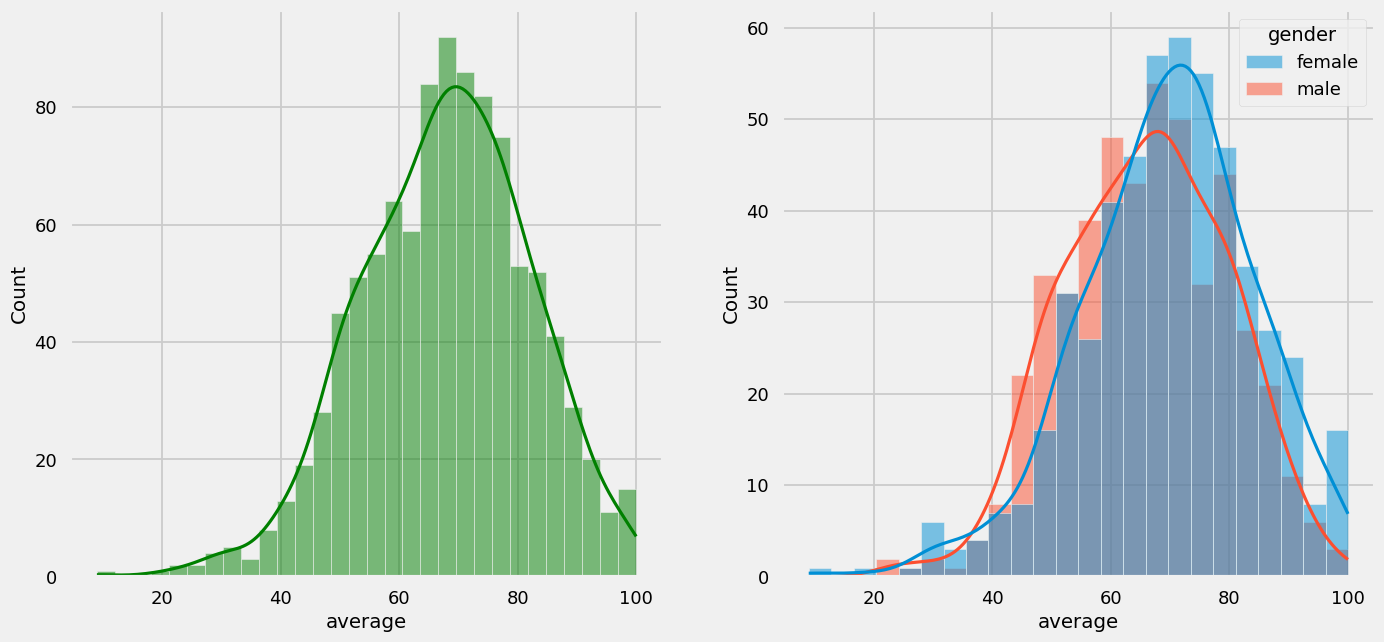

In [71]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=dt,x='average' , bins=30, kde=True,color='g')
plt.subplot(122)
sns.histplot(data=dt, x='average', kde=True , hue='gender')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

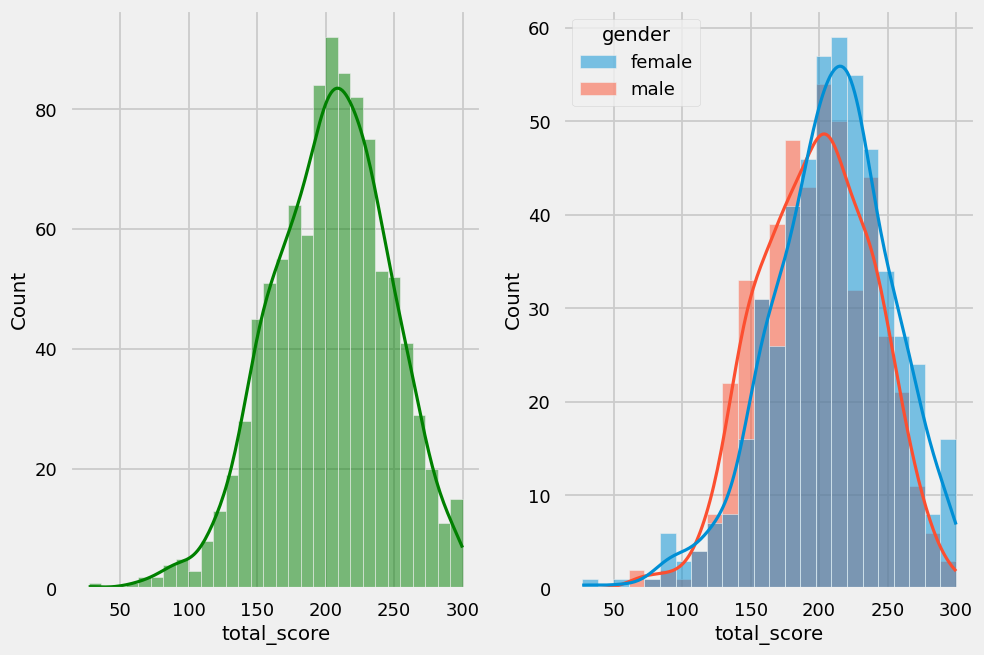

In [72]:
plt.subplot(121)
sns.histplot(data=dt, x='total_score' ,kde=True , bins=30 , color='g')
plt.subplot(122)
sns.histplot(data=dt, x='total_score',kde=True , hue='gender')
plt.show

Insights
Female students tend to perform well then male students

C:\Users\NIDHI\AppData\Local\Temp\ipykernel_14208\3516067421.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\NIDHI\AppData\Local\Temp\ipykernel_14208\3516067421.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\NIDHI\AppData\Local\Temp\ipykernel_14208\3516067421.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


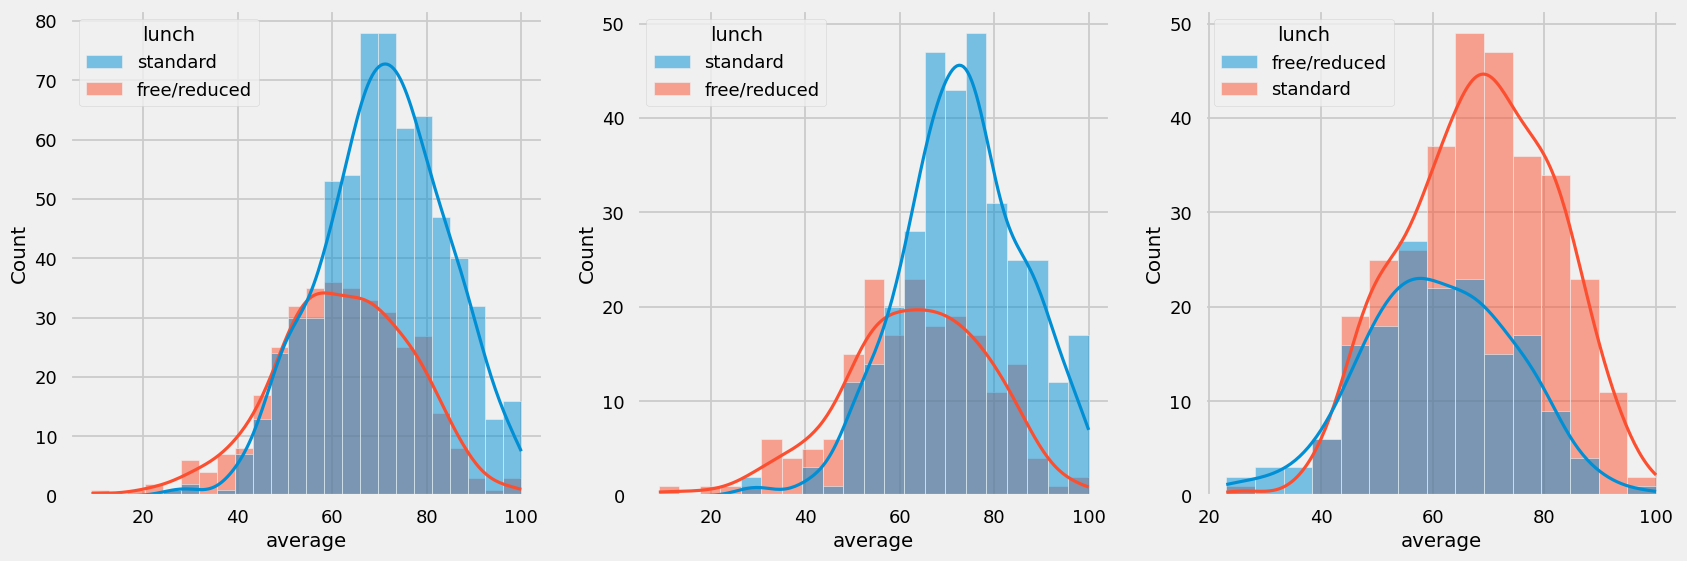

In [73]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=dt, x='average' , kde= True , hue='lunch')
plt.subplot(142)
sns.histplot(data=dt[dt.gender=='female'], x='average' , kde=True , hue='lunch')
plt.subplot(143)
sns.histplot(data=dt[dt.gender=='male'],x='average' , kde=True , hue= 'lunch')
plt.show()

Insights

Standard lunch helps perform well in exams.

Standard lunch helps perform well in exams be it a male or a female

C:\Users\NIDHI\AppData\Local\Temp\ipykernel_14208\399530082.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\NIDHI\AppData\Local\Temp\ipykernel_14208\399530082.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\NIDHI\AppData\Local\Temp\ipykernel_14208\399530082.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


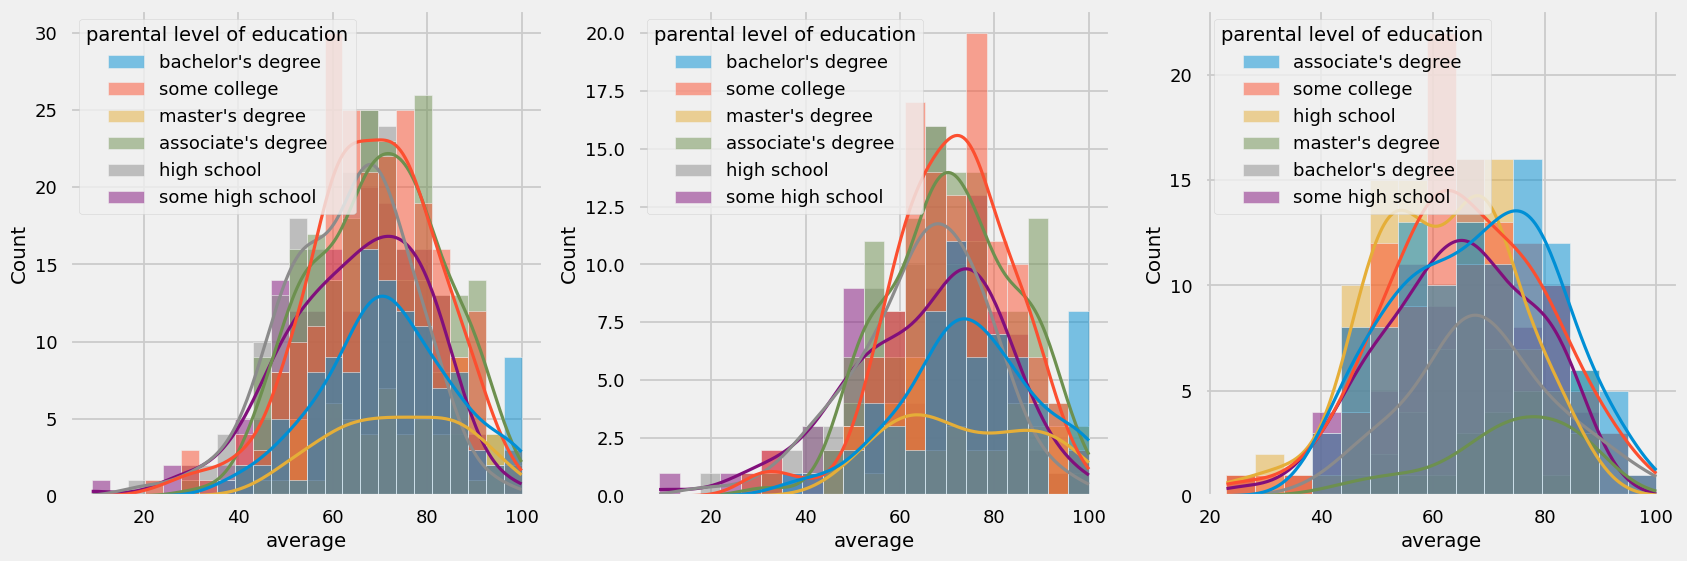

In [74]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=dt,x='average' , kde=True ,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=dt[dt.gender=='female'], x='average', kde=True, hue='parental level of education')
plt.subplot(143)
sns.histplot(data=dt[dt.gender=='male'],x='average', kde=True,hue='parental level of education')
plt.show()

Insights

.In general parent's education don't help student perform well in exam.

.2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to 
perform well in exam

.3rd plot we can see there is no effect of parent's education on female students.

C:\Users\NIDHI\AppData\Local\Temp\ipykernel_14208\2471121589.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\NIDHI\AppData\Local\Temp\ipykernel_14208\2471121589.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\NIDHI\AppData\Local\Temp\ipykernel_14208\2471121589.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


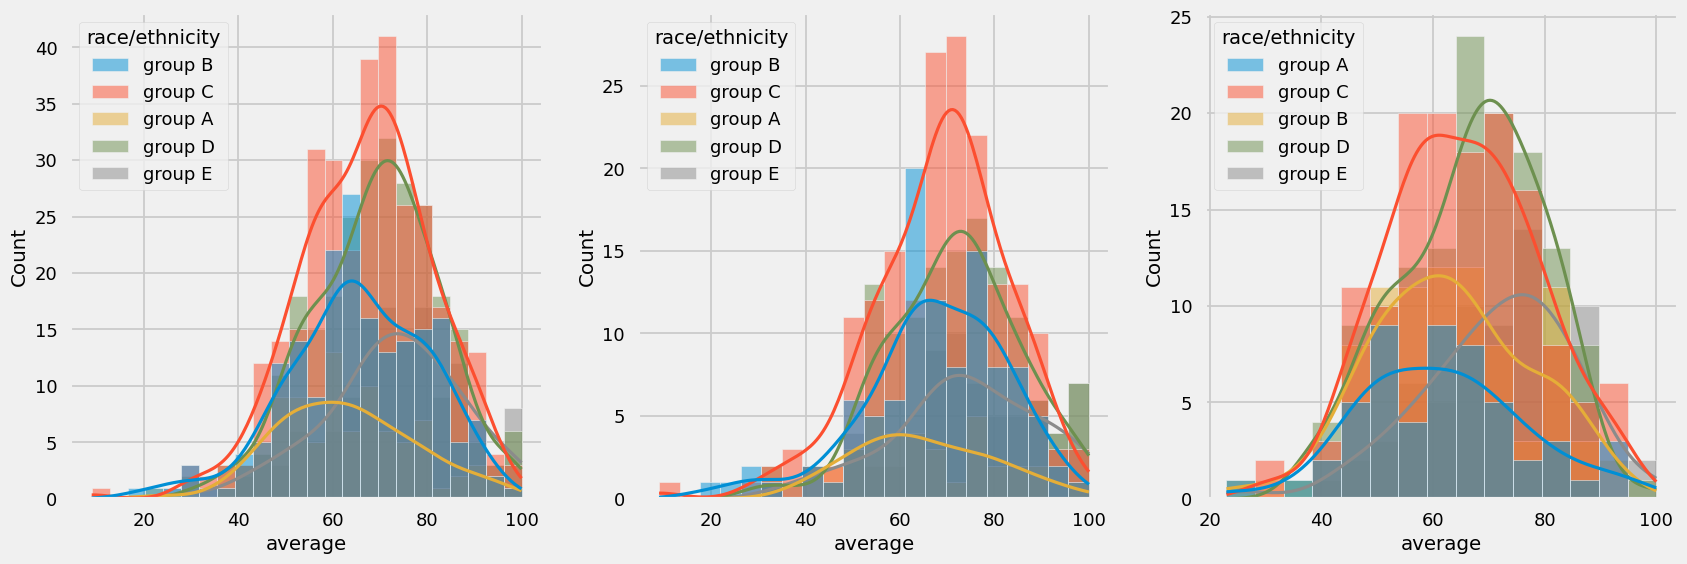

In [75]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=dt,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=dt[dt.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=dt[dt.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

# Insights

.Students of group A and group B tends to perform poorly in exam.

.Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

.
ques. Maximumum score of students in all three subjects

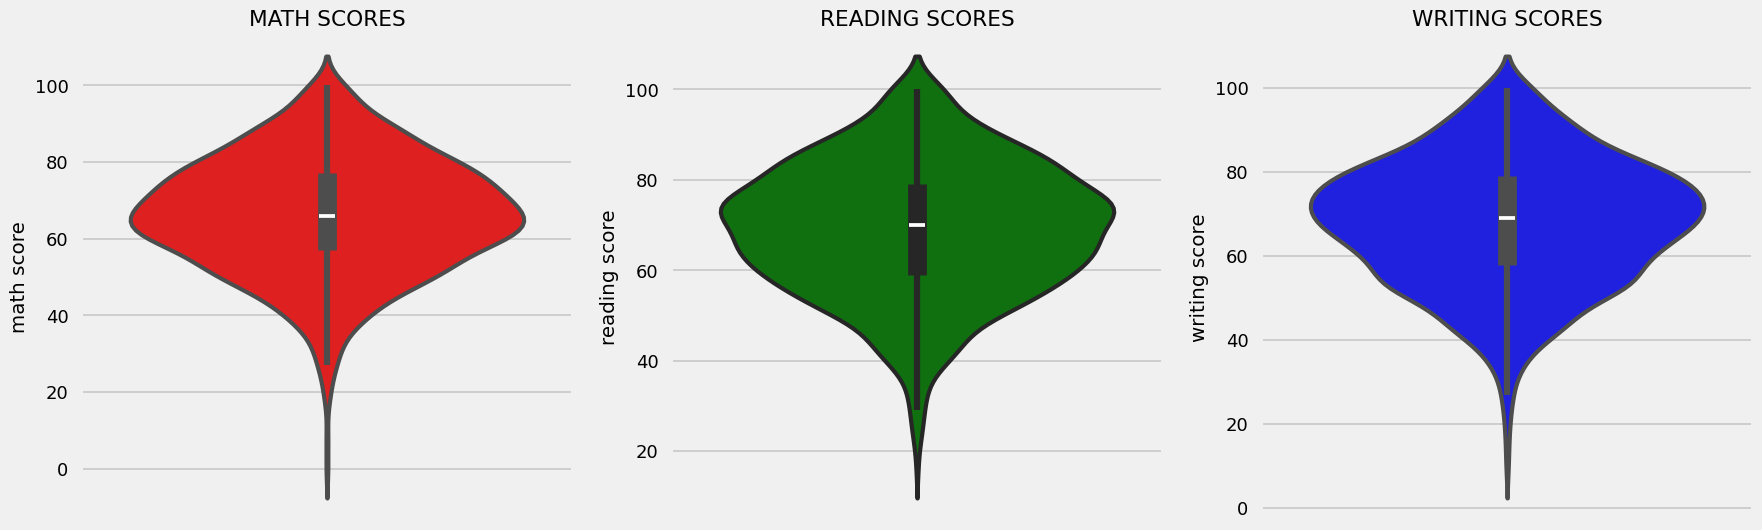

In [76]:
plt.figure(figsize=(26,6))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=dt,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=dt,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=dt,color='blue',linewidth=3)
plt.show()

Insights

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in 
reading and writing most of them score from 50-80

4.3 Multivariate analysis using pieplot

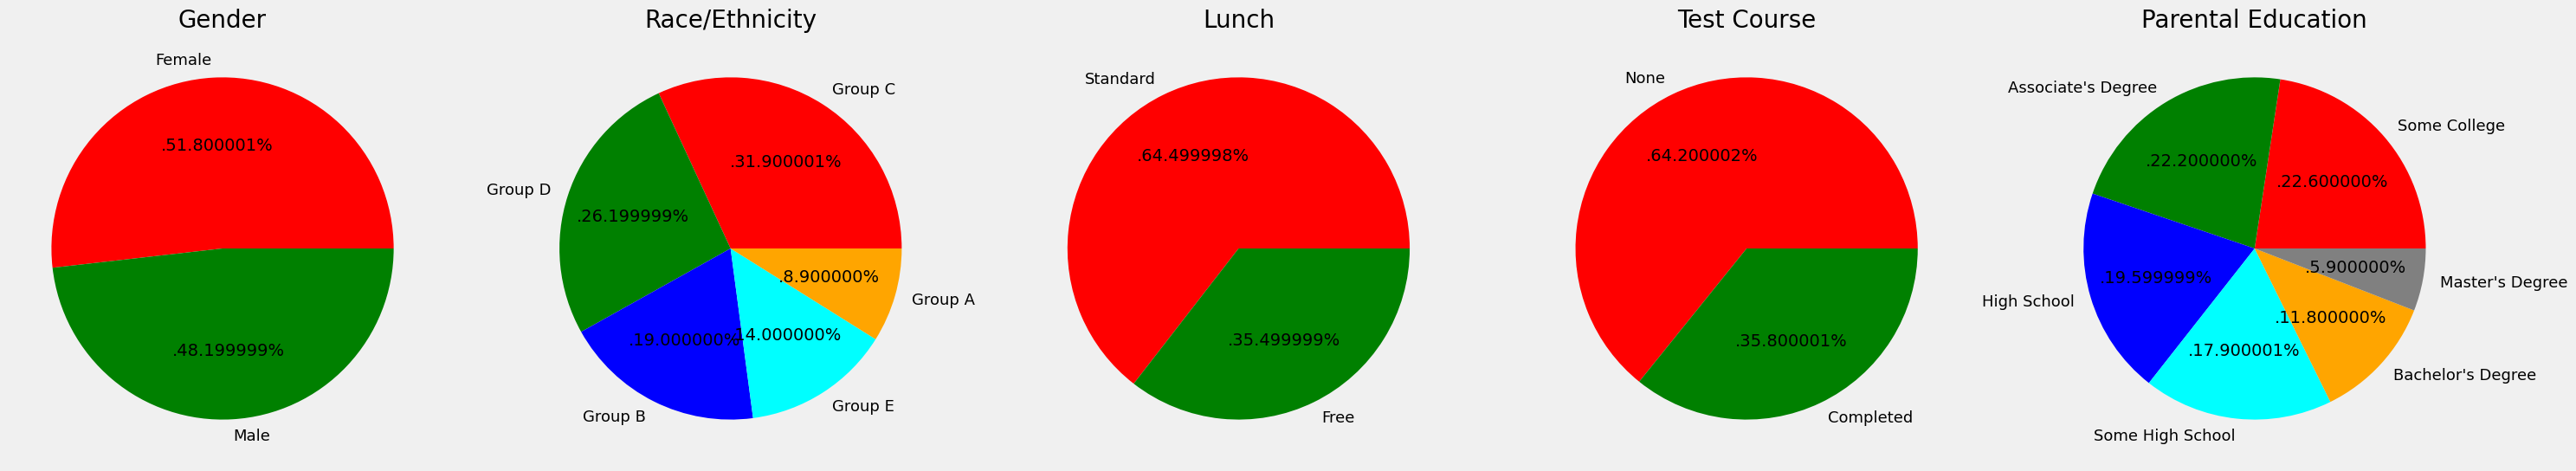

In [77]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = dt['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = dt['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = dt['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = dt['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = dt['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()


# Insights
Number of Male and Female students is almost equal

Number students are greatest in Group C

Number of students who have standard lunch are greater

Number of students who have not enrolled in any test preparation course is greater

Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

4.4 Feature Wise Visualization

4.4.1 GENDER COLUMN

How is distribution of Gender ?

Is gender has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

C:\Users\NIDHI\AppData\Local\Temp\ipykernel_14208\2795116759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dt['gender'],data=dt,palette ='bright',ax=ax[0],saturation=0.95)


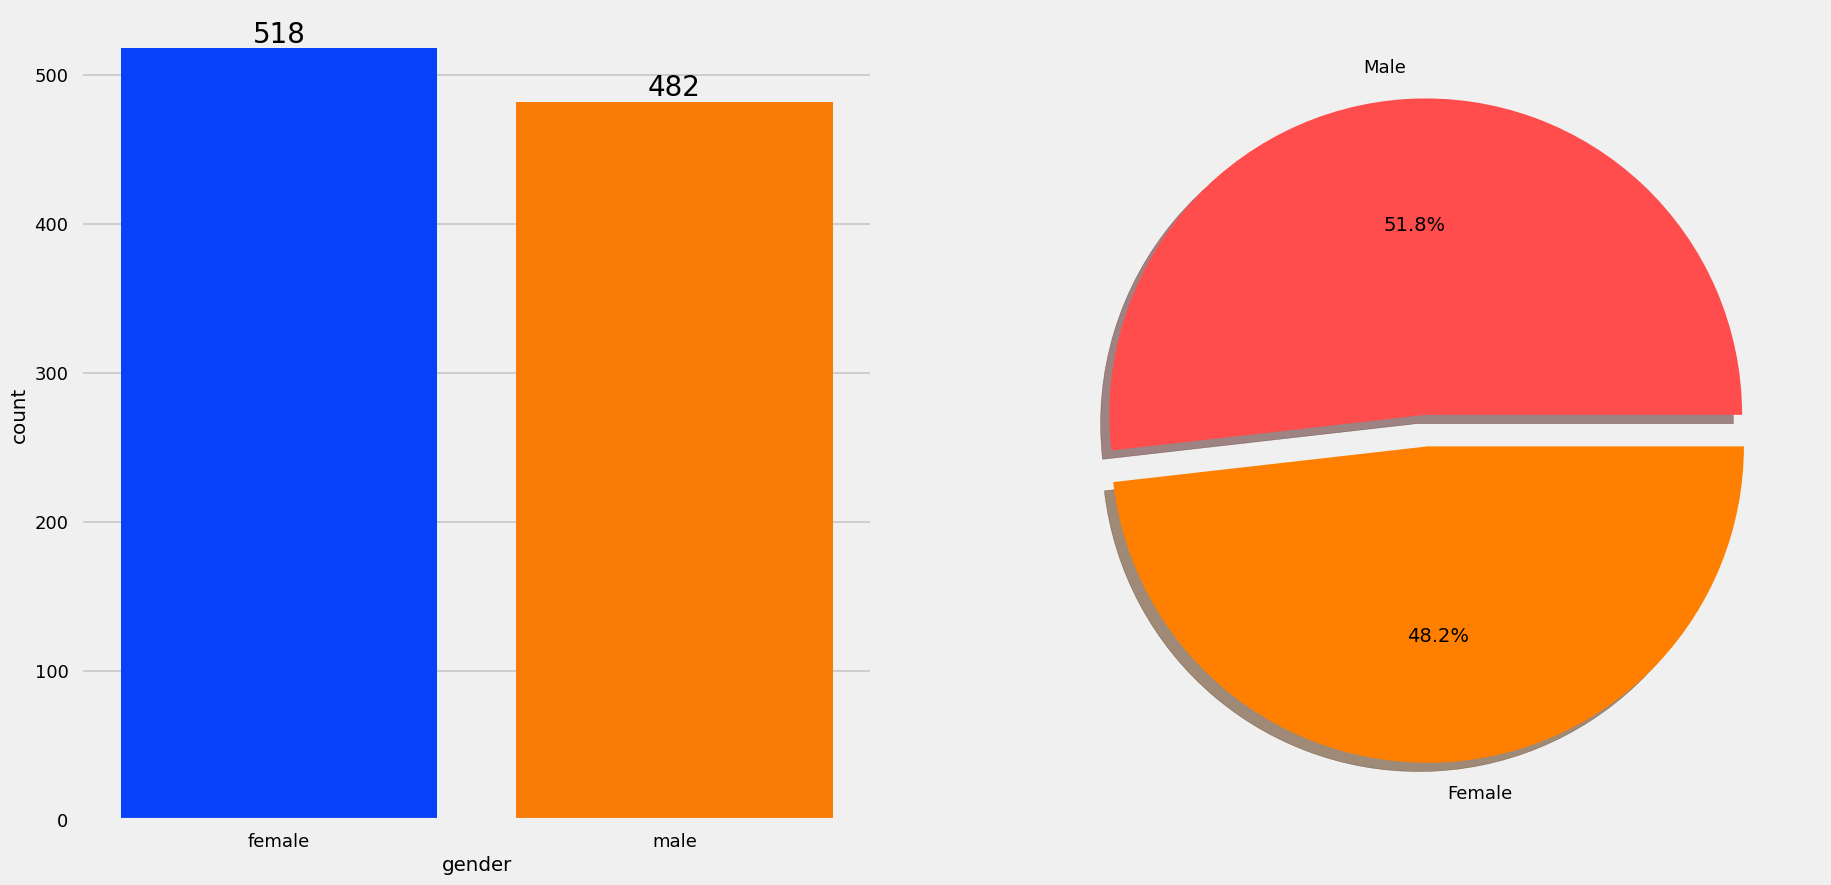

In [78]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=dt['gender'],data=dt,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=dt['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights

Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

que . BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [79]:
gender_group=dt.groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


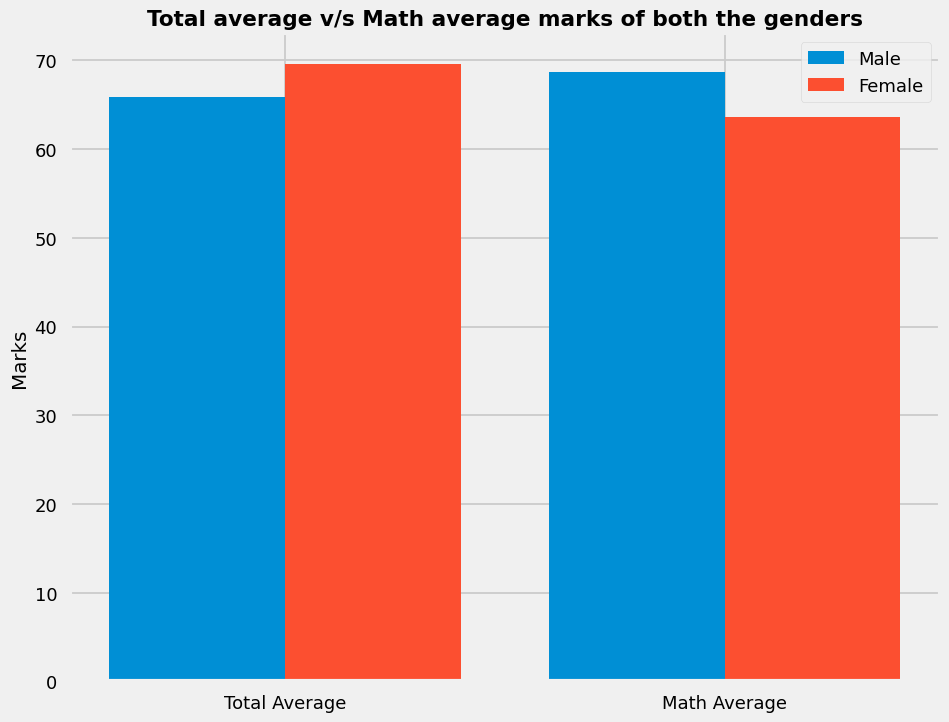

In [80]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights

*On an average females have a better overall score than men.
*whereas males have scored higher in Maths.

RACE/EHNICITY COLUMN

How is Group wise distribution ?

Is Race/Ehnicity has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

C:\Users\NIDHI\AppData\Local\Temp\ipykernel_14208\3063585313.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dt['race/ethnicity'],data=dt,palette = 'bright',ax=ax[0],saturation=0.95)


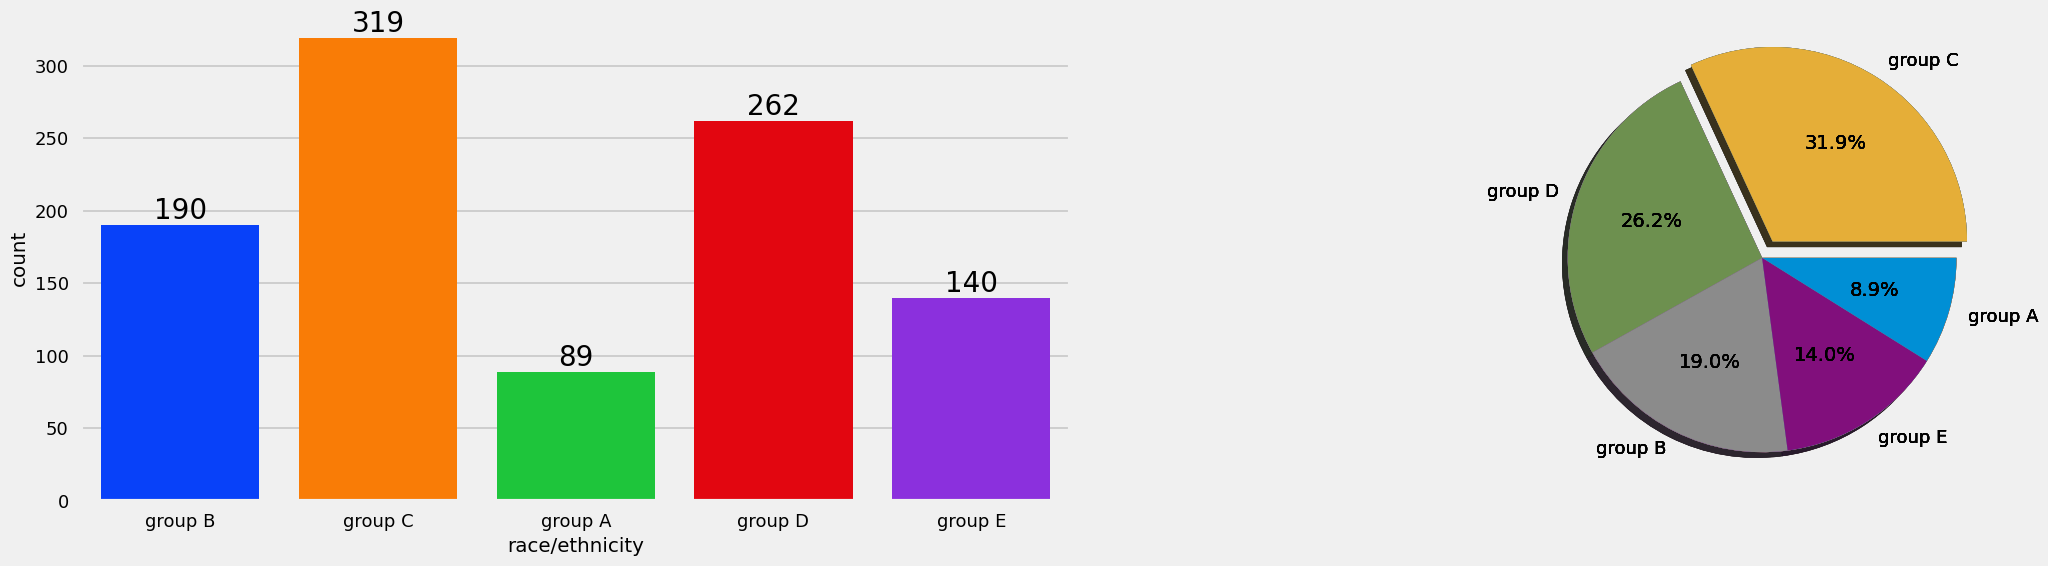

In [81]:
f, ax=plt.subplots(1,2, figsize=(25,6))
sns.countplot(x=dt['race/ethnicity'],data=dt,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    plt.pie(x = dt['race/ethnicity'].value_counts(),labels=dt['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

Insights

Most of the student belonging from group C /group D.

Lowest number of students belong to groupA.

BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

C:\Users\NIDHI\AppData\Local\Temp\ipykernel_14208\1058885951.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
C:\Users\NIDHI\AppData\Local\Temp\ipykernel_14208\1058885951.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
C:\Users\NIDHI\AppData\Local\Temp\ipykernel_14208\1058885951.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same eff

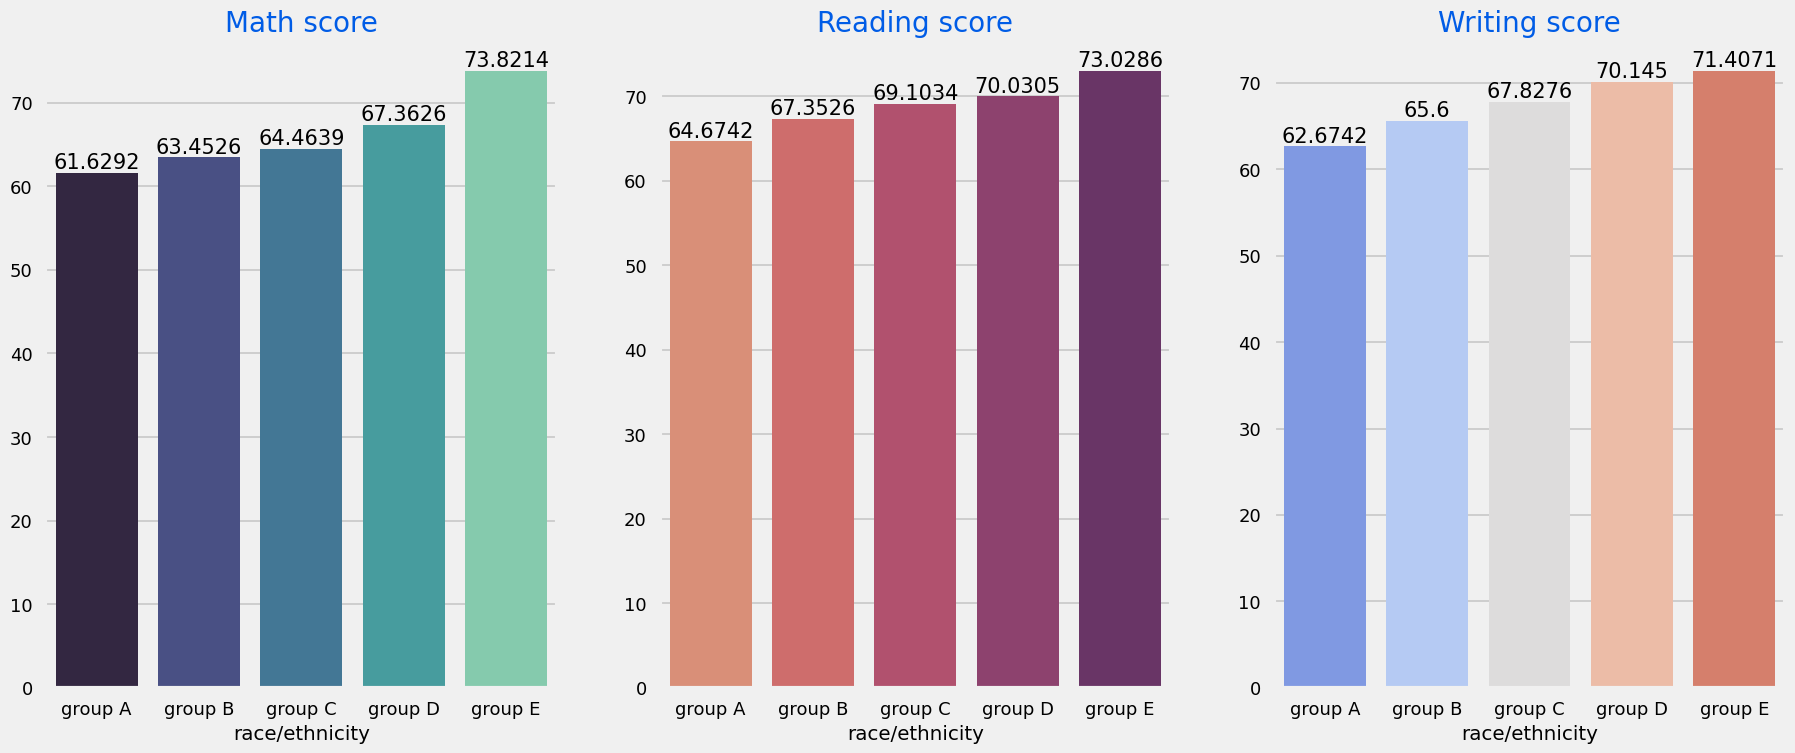

In [82]:
Group_data2=dt.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights

Group E students have scored the highest marks.

Group A students have scored the lowest marks.

Students from a lower Socioeconomic status have a lower avg in all course subjects


# 4.3 PARENTAL LEVEL OF EDUCATION COLUMN

What is educational background of student's parent ?

Is parental education has any impact on student's performance ?

UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

C:\Users\NIDHI\AppData\Local\Temp\ipykernel_14208\3221919965.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(dt['parental level of education'], palette = 'Blues')


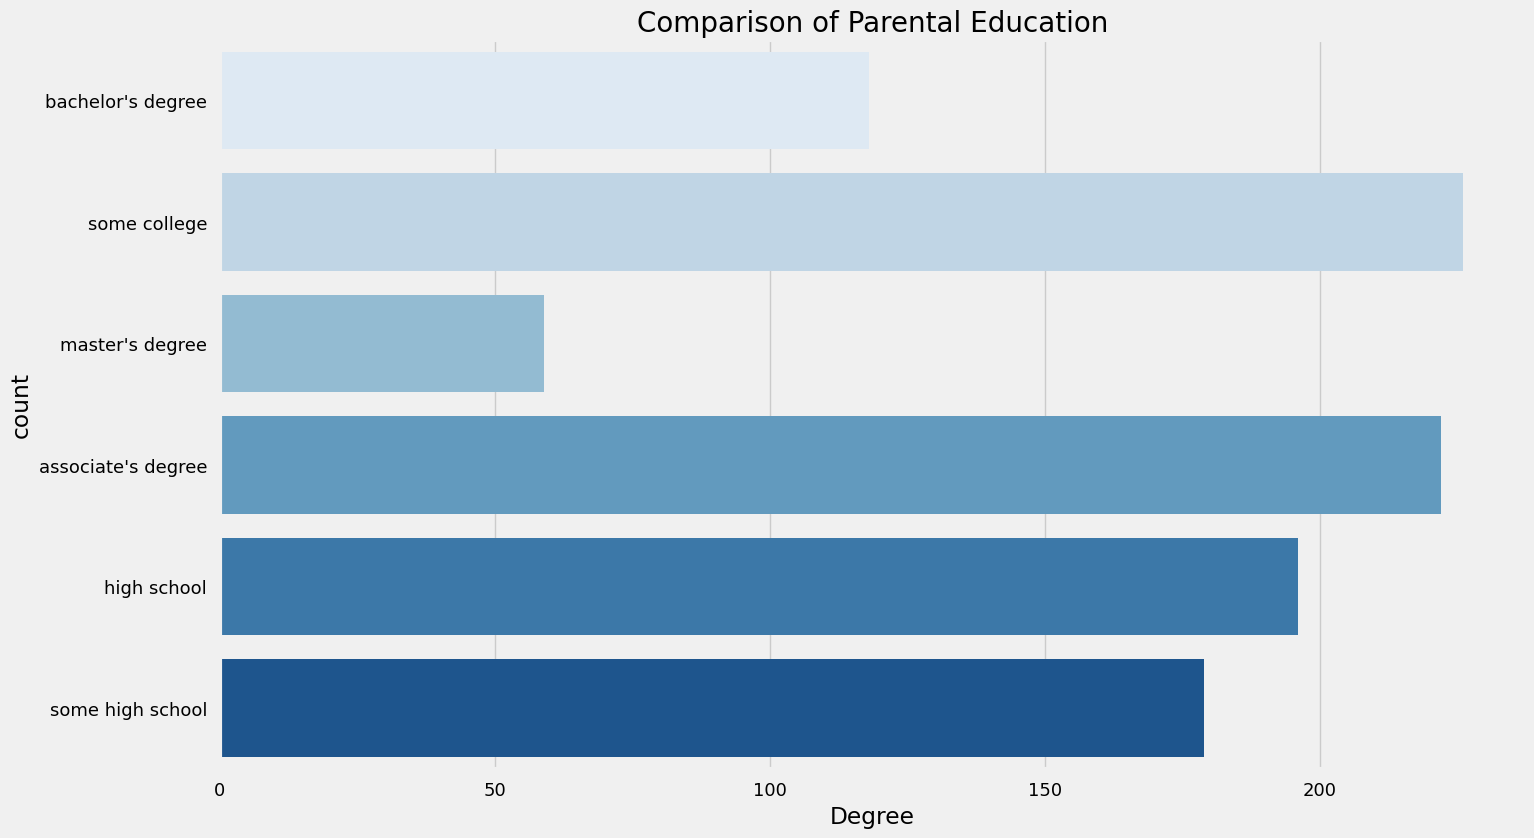

In [83]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(dt['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Insights

Largest number of parents are from some college

BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

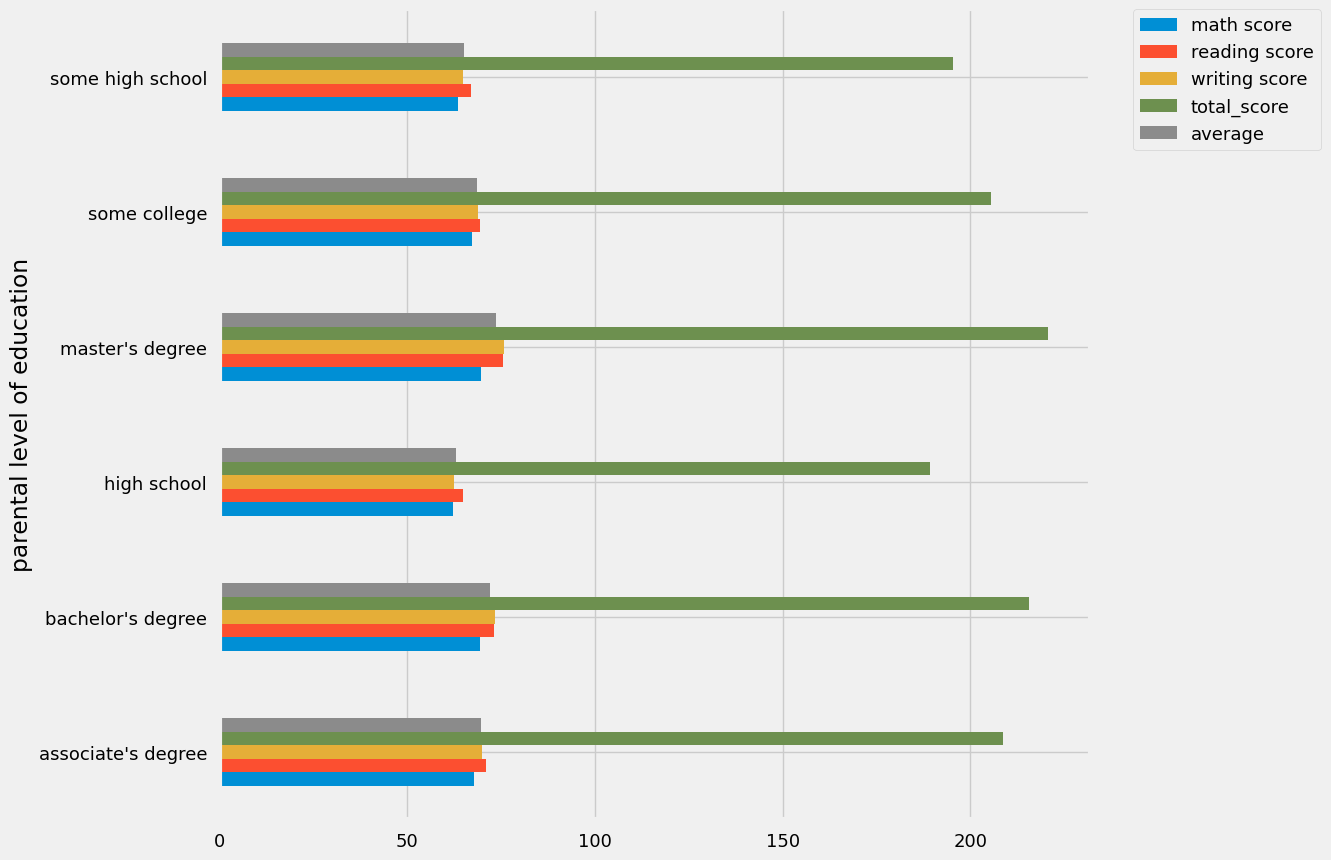

In [84]:
# Select only numeric columns
numeric_cols = dt.select_dtypes(include='number').columns

# Group by 'parental level of education' and calculate the mean only for numeric columns
dt.groupby('parental level of education')[numeric_cols].mean().plot(kind='barh', figsize=(10, 10))

# Optional: move the legend to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()

# Insights
The score of student whose parents possess master and bachelor level education are higher than others.
# 4.4 LUNCH COLUMN
Which type of lunch is most common amoung students ?

What is the effect of lunch type on test results?

UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

C:\Users\NIDHI\AppData\Local\Temp\ipykernel_14208\230894635.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dt, x='lunch', palette='Set2')


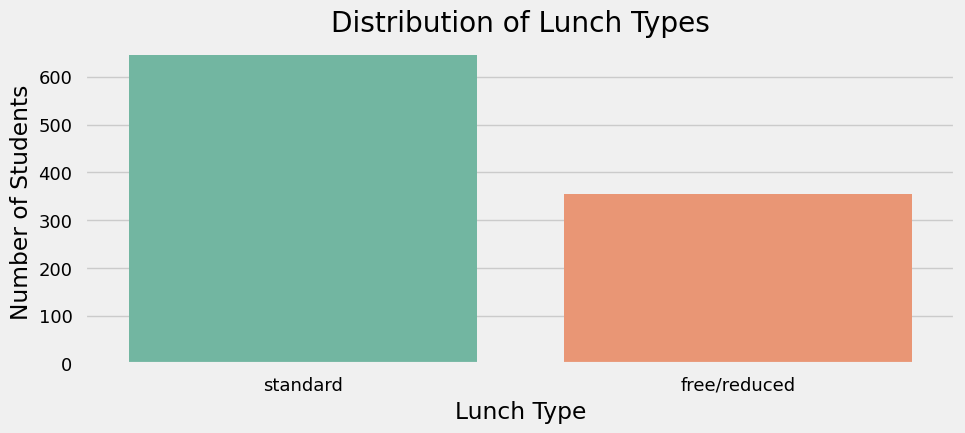

In [85]:
plt.rcParams['figure.figsize'] = (10, 4)
sns.countplot(data=dt, x='lunch', palette='Set2')
plt.title('Distribution of Lunch Types')
plt.xlabel('Lunch Type')
plt.ylabel('Number of Students')
plt.show()

C:\Users\NIDHI\AppData\Local\Temp\ipykernel_14208\1673740694.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')
C:\Users\NIDHI\AppData\Local\Temp\ipykernel_14208\1673740694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(dt['lunch'], palette = 'PuBu')


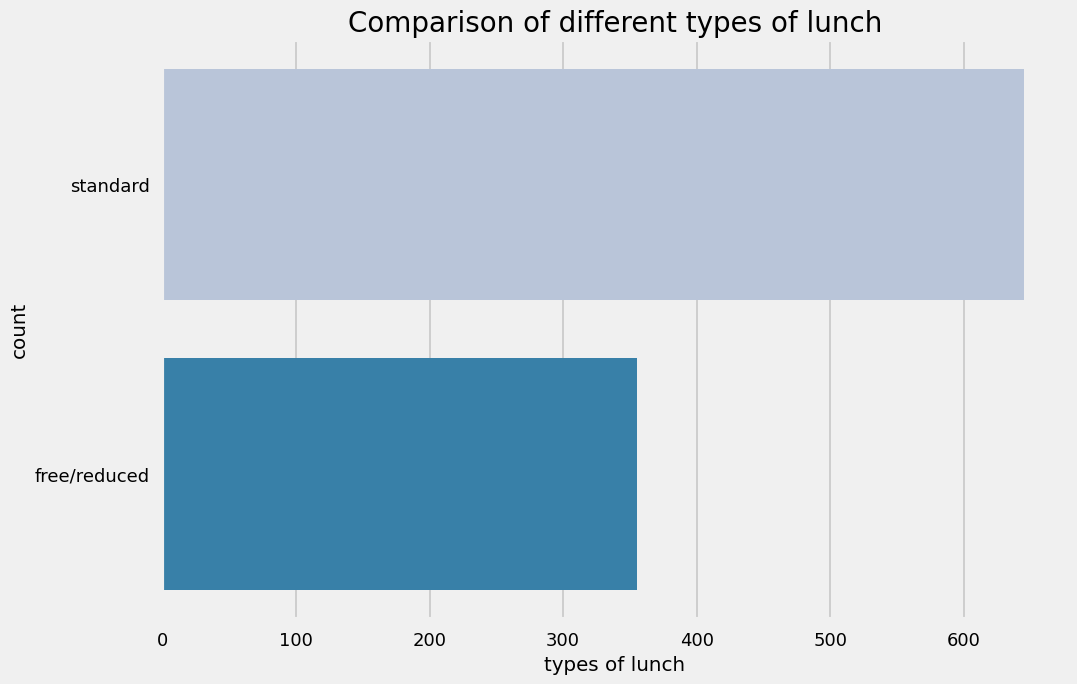

In [86]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('seaborn-talk')
sns.countplot(dt['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Insights

Students being served Standard lunch was more than free lunch

BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

In [87]:
# Columns to analyze
score_columns = ['math score', 'reading score', 'writing score', 'average']

# Mean scores by lunch type
mean_scores = dt.groupby('lunch')[score_columns].mean()
print(mean_scores)


              math score  reading score  writing score    average
lunch                                                            
free/reduced   58.921127      64.653521      63.022535  62.199061
standard       70.034109      71.654264      70.823256  70.837209


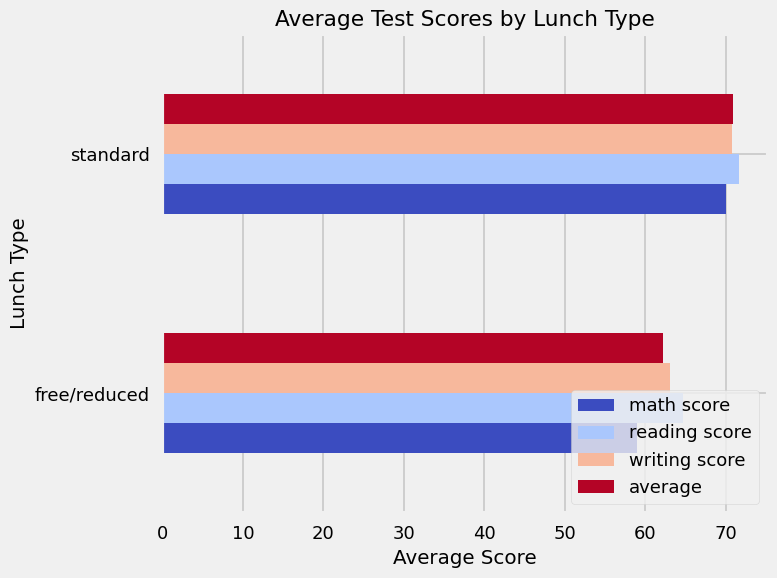

In [88]:
mean_scores.plot(kind='barh', figsize=(8, 6), colormap='coolwarm')
plt.title('Average Test Scores by Lunch Type')
plt.xlabel('Average Score')
plt.ylabel('Lunch Type')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


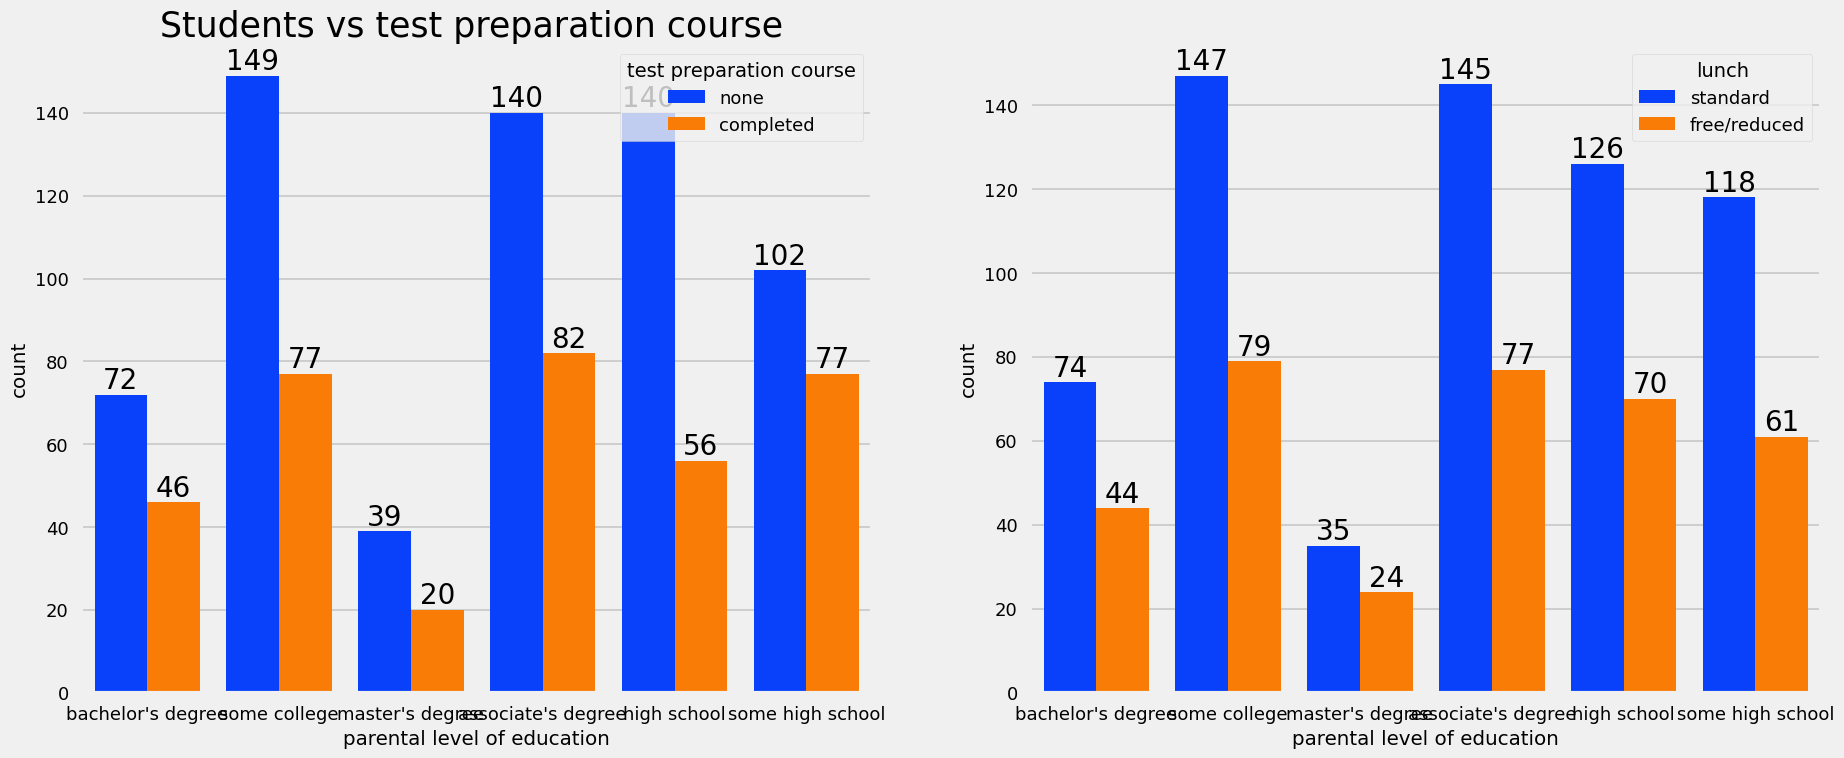

In [89]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=dt['parental level of education'],data=dt,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=dt['parental level of education'],data=dt,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

Insights

Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

# 4.5 TEST PREPARATION COURSE COLUMN

Which type of lunch is most common amoung students ?

Is Test prepration course has any impact on student's performance ?

BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing score'>

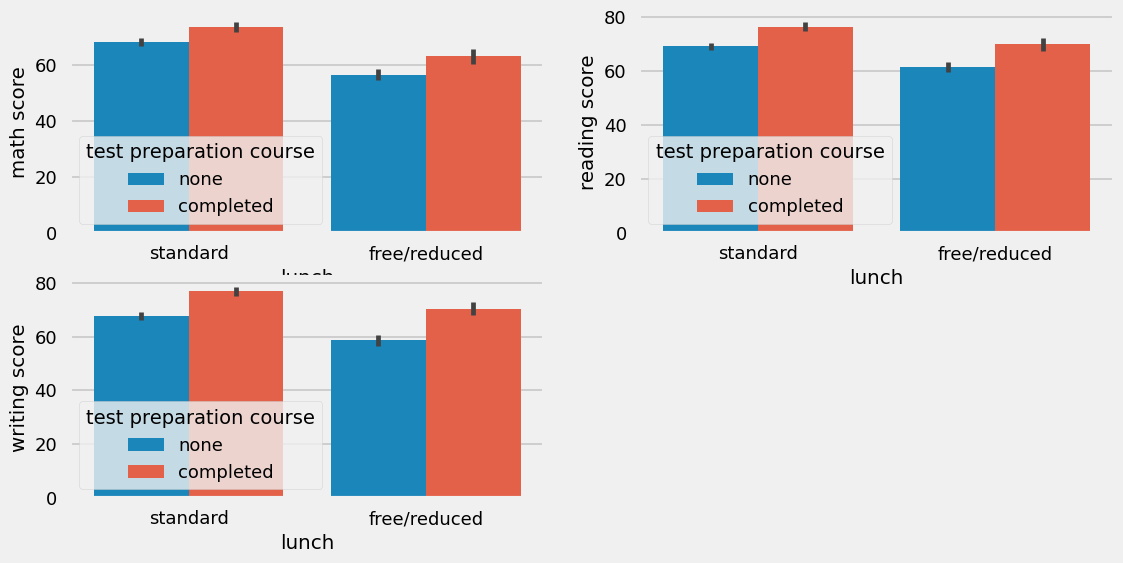

In [90]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=dt['lunch'], y=dt['math score'], hue=dt['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=dt['lunch'], y=dt['reading score'], hue=dt['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=dt['lunch'], y=dt['writing score'], hue=dt['test preparation course'])

Insights
Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course
4.4.6 CHECKING OUTLIERS

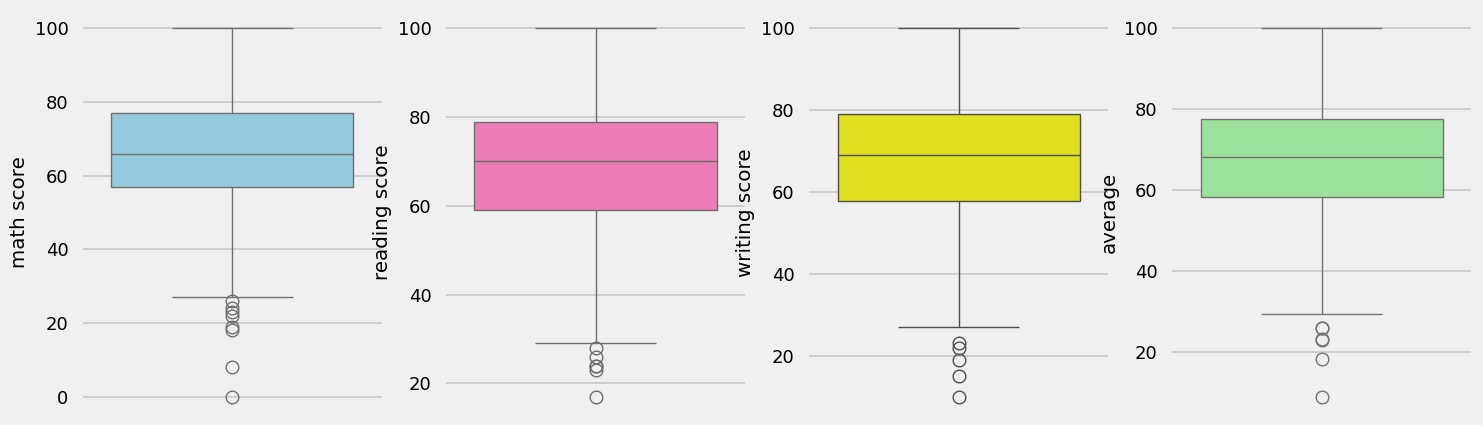

In [91]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(dt['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(dt['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(dt['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(dt['average'],color='lightgreen')
plt.show()

.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

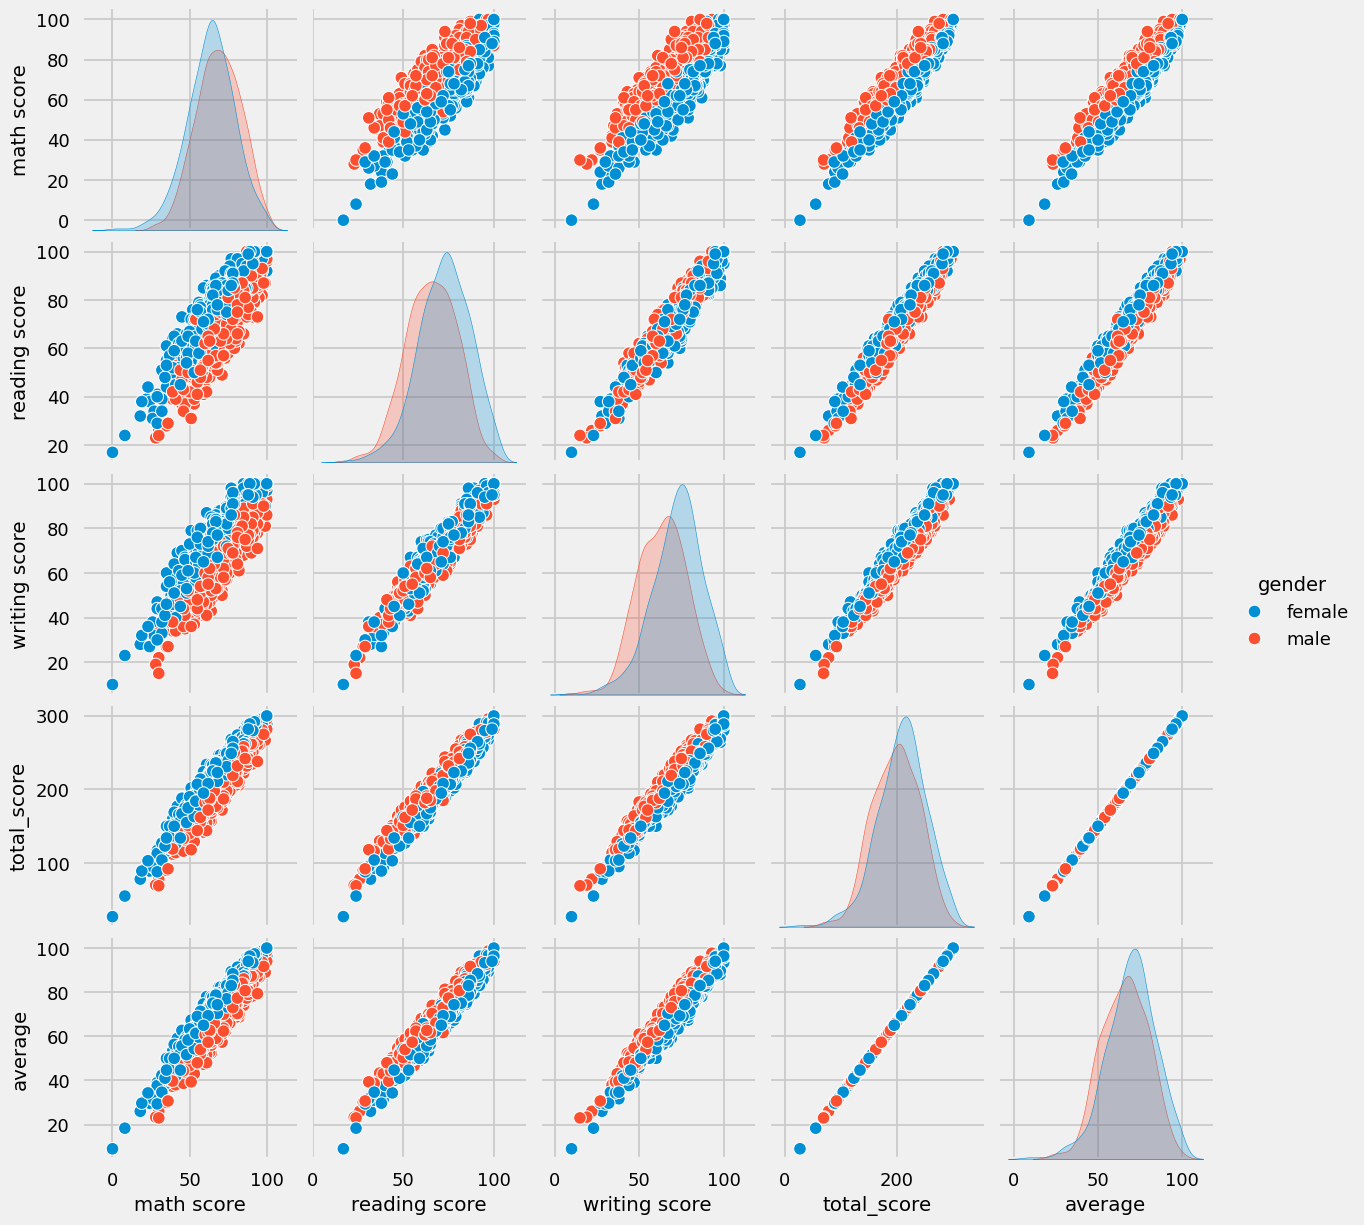

In [92]:
sns.pairplot(dt,hue = 'gender')
plt.show()

Insights

From the above plot it is clear that all the scores increase linearly with each other.

5. Conclusions

Student's Performance is related with lunch, race, parental level education

Females lead in pass percentage and also are top-scorers

Student's Performance is not much related with test preparation course

Finishing preparation course is benefitial.